In [1]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from numpy import random
import time 
import copy 
import csv

In [ ]:
def calculate_v_values(Q_values_action1, Q_values_action2):
    V_values = np.zeros((100,9))
    for i in range(100):
        for j in range(9):
            V_values[i][j] = max(Q_values_action1[i][j],Q_values_action2[i][j])  # Use keepdims=True to maintain the 2D shape
    return V_values

V_true = np.zeros((100,9))
V_true[1,:] = [ 2.88866783e+01,  3.15085928e+01,  3.40536870e+01,  3.57302799e+01,
   3.86458610e+01,  4.02700595e+01,  4.33413655e+01,  4.58000668e+01,
   4.77588016e+01]
V_true[2,:] =  [ 4.10888854e+01 , 4.65526320e+01,  5.26920938e+01,  5.59839147e+01,
   6.45651019e+01,  6.85675634e+01,  7.75534687e+01,  8.56410058e+01,
   9.25763321e+01]
V_true[3,:] =  [ 5.08628628e+01,  5.63930518e+01,  5.98191169e+01,  6.61043434e+01,
   7.16273587e+01,  7.58738044e+01,  8.24998123e+01,  8.61913750e+01,
   8.50192653e+01]
V_true[4,:] =  [ 6.24605652e+01,  6.27808790e+01,  6.82740106e+01,  7.22510249e+01,
   7.60514963e+01,  7.29368165e+01,  6.19245576e+01,  4.28895914e+01,
   1.27635876e+01]
V_true[5,:] =  [ 6.81366238e+01,  6.80016985e+01,  6.64720862e+01,  6.06085033e+01,
   4.33396239e+01,  3.39154748e+01,  1.60047605e+01,  5.21846082e+00,
   8.90324633e-01]
V_true[6,:] = [ 6.19898757e+01,  5.50271944e+01,  4.17116023e+01 , 2.65621589e+01,
   1.38618104e+01,  5.76521983e+00,  1.18218252e+00,  2.99576000e-01,
   0.00000000e+00]
V_true[7,:] =  [ 3.52320491e+01,  2.41356914e+01,  1.21776708e+01,  5.48761699e+00,
   2.23389373e+00,  8.89787830e-01,  0.00000000e+00,  0.00000000e+00,
   0.00000000e+00]
V_true[8,:] = [ 9.26027985e+00,  5.04402188e+00,  4.08399120e+00,  5.92930470e-01,
   1.18520760e+00,  0.00000000e+00,  2.98702000e-01,  0.00000000e+00,
   0.00000000e+00]
V_true[9,:] =  [ 1.76669278e+00,  1.77985116e+00,  2.95460000e-01,  0.00000000e+00,
   0.00000000e+00,  0.00000000e+00 , 0.00000000e+00  ,0.00000000e+00,
   0.00000000e+00]
# V_true = [9, 8.15241315, 7.47595723, 6.90163656, 6.49113047]

def bellman_relative_error(V_approx, V_true):
    nonzero_indices = V_true != 0
    if np.any(nonzero_indices):
        #relative_errors = np.abs((V_approx[nonzero_indices] - V_true[nonzero_indices]) / V_true[nonzero_indices])
        relative_errors = np.abs((V_approx[nonzero_indices] - V_true[nonzero_indices]))
        return np.mean(relative_errors)
    else:
        return np.nan

In [3]:
def get_prob(step,p1,lamda):
    pi = [0]*step
    for i in range(1,step):
        pi[i]=(1-(1-p1)*((lamda)**(i)))
    mul = pi[step-1]
    return mul 

class envir():
    def __init__(self):
        self.phi = 9
        self.lamda = 0.8 
        self.p1=[]
        for i in range(9):
            self.p1.append(0.1*(i+1))

    def step(self,s,task):
            next_state = copy.copy(s)
            if s[task] == 0:
                next_state[task] = 0
            else:
                #print(s,task,get_prob(s[task],self.p1[task],self.lamda))
                next_state[task] = random.choice([0,s[task]+1],1,p=[get_prob(s[task],self.p1[task],self.lamda),1-get_prob(s[task],self.p1[task],self.lamda)])
            if s[task]!=0 and next_state[task] == 0:
                reward = 1
            elif s[task]==0:
                reward = -10000
            else:
                reward = 0
            return next_state,reward
            

class Agent():
    def __init__(self,alpha,gamma):
        self.Q_values = np.zeros((100,100,9))
        self.alpha = alpha
        #self.c= c
        self.gamma = gamma
        
    def activate_task_eps_greedy(self,s,M,epsilon):
        r = random.random()
        if r < epsilon:
            action = np.random.choice(9)
        else:
            gre = [0]*len(s)
            for i in range(len(s)):
                gre[i] = M[s[i]][i]
            action = np.argmax(gre)
        return action
    
    def check_best_action(self,state):
        inds = np.argmax(state)
        all_inds = []
        for i in range(len(state)):
            if state[inds] == state[i]:
                all_inds.append(i)
        return all_inds


  0%|          | 0/2500 [00:00<?, ?it/s]C:\Users\Harshit\AppData\Local\Temp\ipykernel_23812\1783489862.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_state[task] = random.choice([0,s[task]+1],1,p=[get_prob(s[task],self.p1[task],self.lamda),1-get_prob(s[task],self.p1[task],self.lamda)])
100%|██████████| 2500/2500 [02:40<00:00, 15.55it/s]

[[-3.65058275e+005 -5.60861048e+005 -7.05519933e+005 -7.75836411e+005
  -7.97196641e+005 -8.78789539e+005 -9.07488138e+005 -9.31019796e+005
  -9.52158625e+005]
 [ 2.87553819e+001  3.16926148e+001  3.42466214e+001  3.63168301e+001
   3.94450665e+001  4.13084342e+001  4.39512369e+001  4.59769582e+001
   4.76662407e+001]
 [ 3.95605797e+001  4.51915671e+001  5.21920385e+001  5.69201823e+001
   6.54346833e+001  7.05108477e+001  7.87012598e+001  8.54305704e+001
   9.22004128e+001]
 [ 4.88658904e+001  5.66156375e+001  5.85812159e+001  6.35008154e+001
   6.42080006e+001  6.85344294e+001  6.57092688e+001  6.36084706e+001
   3.94182294e+001]
 [ 5.85210921e+001  5.64691602e+001  5.18109200e+001  5.27460813e+001
   4.37600713e+001  3.49300768e+001  2.44810271e+001  8.74220021e+000
   4.39642248e+000]
 [ 5.36924047e+001  4.42620749e+001  3.75622629e+001  2.65670691e+001
   1.39337338e+001  1.07952207e+001  3.53596057e+000  1.48693635e+000
   9.88131292e-324]
 [ 3.51475457e+001  2.18549064e+001  1.4

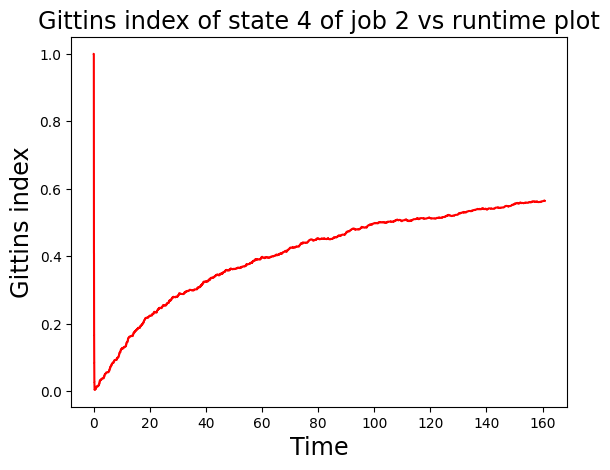

In [6]:
from tqdm import tqdm
def select_task(s,M):
        k = []
        for i in range(9):
            k.append(M[s[i]][i])
        max_index = np.argmax(k)  # Get the index of the maximum value
        return max_index
class game():
    start_time = time.time()
    t = 0
    M = np.zeros((100,9))
    for i in range(100):
        for j in range(9):
            M[i][j] = 100
    Q_values = np.zeros((100,100,9))
    c0 = 0
    hist01 = []
    ti = []
    c1 = 0
    m = 0
    m1 = 0
    ct = 0
    cumm_rew = []
    BRE = []
    plt_wrong_actions = []
    cumm_wrong_steps = []
    eps = 0.2
    F = np.zeros((100,9))
    env = envir()
    episodes = 2500
    agent = Agent(alpha = 0.3,gamma = 0.99)
    for i in tqdm(range(episodes)):
        s = np.array([1,1,1,1,1,1,1,1,1])
        t = t+1
        #Calculating Q values over state space for a given arm for the given M vector through Q learning
        #for step in range(2):
        episode_rew = 0
        while (s[0]!=0 or s[1]!=0 or s[2]!=0 or s[3]!=0 or s[4]!=0 or s[5]!=0 or s[6]!=0 or s[7]!=0 or s[8]!=0):
            if len(cumm_rew)==0:
                cumm_rew.append(episode_rew)
            else:
                cumm_rew.append(cumm_rew[-1]+episode_rew)
            #print(s)
            task_eps = agent.activate_task_eps_greedy(s,M,eps)
            task_opt = agent.check_best_action(s)
            task = task_eps
            #task = select_task(s,M)
            current_time = time.time()-start_time
            next_state, R = env.step(s,task)
            episode_rew+=R
            if task_eps not in task_opt:
                cumm_wrong_steps.append(1)
            else:
                cumm_wrong_steps.append(0)
            plt_wrong_actions.append(np.mean(cumm_wrong_steps)*100)
            Q0 = np.zeros((100,9))
            for i in range(100):
                for j in range(9):
                    Q0[i][j] = Q_values[i][i][j]
            V_values = calculate_v_values(Q0,M)
            BRE.append(bellman_relative_error(V_values,V_true))

            #print(task)
            #print(next_state)
            #print('r',R)
            for k in range(10):
                Q_values[s[task]][k][task] += agent.alpha*(R+agent.gamma*(max(M[k][task],copy.copy(Q_values[next_state[task]][k][task])))-Q_values[s[task]][k][task])    
            if((t%100)==0):
                agent.alpha = agent.alpha-0.000002
            s= copy.copy(next_state) 

          #Algorithm for stochastic approximation

          #Calculating F
            for i in range(10):
                F[i][task] = -M[i][task]+Q_values[i][i][task]
                #print('F',F[i][task])
                #print('m',M[i][task])
                #print('q',Q_values[i][i][task])

          #Print values
            #print("Iteration no",t)
            #print("F",F)

          #Update M
            for i in range(10):
                M[i][task] = M[i][task] + 0.2*(F[i][task])       
            hist01.append(0.01*M[4][1])
            ti.append(current_time)
          #Stopping criteria
            
          #For M[i]
            '''if(t>=10):
                if(F[0]==0 and (histV0[len(histV0)-1]-histV0[len(histV0)-5]<0.1)):
                    ct=1;
                    m=M[0]   
          #For algorithm
            print(" ")
            histm0.append(M[0])
            histm1.append(M[1])
            if ((np.linalg.norm(F)<.9) or t>=9000) and (t>=2 and np.linalg.norm(V-Vold)<0.1):
                print("Gittin's index for state 0 is",0.2*min(m,(M[0])))
                print("Gittin's index for state 1 is",0.2*(M[1]))
                break'''
    v_values = calculate_v_values(Q0,M)
    print(M)
    plt.title('Gittins index of state 4 of job 2 vs runtime plot',fontsize='xx-large')
    plt.xlabel('Time', fontsize = 'xx-large')
    plt.ylabel('Gittins index',fontsize = 'xx-large')
    plt.plot(ti,hist01,'-',c='red')
    plt.show()

    
    filename = 'C:\\Intern\\percent_wrong_QGI_monoHR.csv'

    # Writing to CSV file
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['percent_wrong'])  # Writing the header
        for value in plt_wrong_actions:
            writer.writerow([value])  # Writing each value in a new row

    filename = 'C:\\Intern\\BRE_QGI_monoHR.csv'

    # Writing to CSV file
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['BRE'])  # Writing the header
        for value in BRE:
            writer.writerow([value])  # Writing each value in a new row

    filename = 'C:\\Intern\\cumm_rew_QGI_monoHR.csv'
    
    # Writing to CSV file
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['cumm_rew'])  # Writing the header
        for value in cumm_rew:
            writer.writerow([value])  # Writing each value in a new row     
            